## DATA
### Bank Marketing Dataset - UCI ML Repository - https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
### Input variables:
##### Client Data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
##### related with the last contact of the current campaign:
- 8 - contact: contact communication type (categorical: 'cellular','telephone') 
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is     performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
##### other attributes:
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Output variable (desired target):
- 16 - y - has the client subscribed a term deposit? (binary: 'yes','no').


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading the csv

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')
dff = pd.DataFrame()

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

#### Checking for catergorical values to handle.

In [5]:
print('No. of job categories: \n',df.job.unique())
print('\nMarital Statuses: ',df.marital.unique())
print('\nEducation types: ',df.education.unique())
print('\nUnique values for default: ',df.default.unique())
print('\nUnique values for housing: ',df.housing.unique())
print('\nUnique values for loan: ',df.loan.unique())
print('\nContatct number types: ',df.contact.unique())
print('\nOutcome types: ', df.poutcome.unique())
print('\nUnique values for target(y): ',df.y.unique())

No. of job categories: 
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown' 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']

Marital Statuses:  ['married' 'single' 'divorced']

Education types:  ['tertiary' 'secondary' 'unknown' 'primary']

Unique values for default:  ['no' 'yes']

Unique values for housing:  ['yes' 'no']

Unique values for loan:  ['no' 'yes']

Contatct number types:  ['unknown' 'cellular' 'telephone']

Outcome types:  ['unknown' 'failure' 'other' 'success']

Unique values for target(y):  ['no' 'yes']


#### Handling Categorical Values and creating a new and workable dataframe - dff from the original dataframe - df.
- ##### Assigning numerical values to the categorical variables
- ##### Clearing rows with unnecessary and irrelavant negative and zero values

In [6]:
dff['age'] = df['age']

a = list(df['job'].unique())
b = list(range(1,13))
job = []

for i in range(0,len(df['job'])):
    for j in range(0,len(a)):
        if df['job'][i] == a[j]:
            job.append(b[j])

dff['job'] = job


x = [0]*len(df.marital)
for i in range(0,len(df.marital)):
    x[i] = df.marital[i]

for i in range(0,len(x)):
    if x[i] == 'married':
        x[i] = 1
    elif x[i] == 'single':
        x[i] = 2
    elif x[i] == 'divorced':
        x[i] = 3
    else:
        break

dff['marital'] = x
x=[]


x = [0]*len(df['education'])
for i in range(0,len(df['education'])):
    x[i] = df['education'][i]

for i in range(0,len(x)):
    if x[i] == 'primary':
        x[i] = 1
    elif x[i] == 'secondary':
        x[i] = 2
    elif x[i] == 'tertiary':
        x[i] = 3
    elif x[i] == 'unknown':
        x[i] = 4
    else:
        break

dff['education'] = x
x=[]


x = [0]*len(df.contact)
for i in range(0,len(df.contact)):
    x[i] = df.contact[i]

for i in range(0,len(x)):
    if x[i] == 'cellular':
        x[i] = 1
    elif x[i] == 'unknown':
        x[i] = 2
    elif x[i] == 'telephone':
        x[i] = 3
    else:
        break

dff['contact'] = x
x=[]

x = [0]*len(df.poutcome)
for i in range(0,len(df.poutcome)):
    x[i] = df.poutcome[i]

for i in range(0,len(x)):
    if x[i] == 'unknown':
        x[i] = 1
    elif x[i] == 'failure':
        x[i] = 2
    elif x[i] == 'other':
        x[i] = 3
    elif x[i] == 'success':
        x[i] = 4
    else:
        break

dff['poutcome'] = x
x=[]

dff['balance'] = df['balance'] 
dff['duration'] =  df['duration'] 
dff['campaign'] = df['campaign']
dff['pdays'] = df['pdays']
dff['previous'] = df['previous']

p = ['default','housing','loan','y']    

for k in p:    
    x = [0]*len(df[k])
    for i in range(0,len(df[k])):
        x[i] = df[k][i]

    for i in range(0,len(x)):
        if x[i] == 'no':
            x[i] = 0
        elif x[i] == 'yes':
            x[i] = 1
        else:
            break

    dff[k] = x
    x=[]

dff = dff.drop(dff[dff['pdays'] == -1].index)
dff = dff.drop(dff[dff['duration'] == 0].index)

dff.head(10)

,age,job,marital,education,contact,poutcome,balance,duration,campaign,pdays,previous,default,housing,loan,y
24060,33,7,1,3,3,2,882,39,1,151,3,0,0,0,0
24062,42,7,2,2,3,3,-247,519,1,166,1,0,1,1,1
24064,33,8,1,2,3,2,3444,144,1,91,4,0,1,0,1
24072,36,1,1,3,3,3,2415,73,1,86,4,0,1,0,0
24077,36,1,1,3,3,2,0,140,1,143,3,0,1,0,1
24080,56,2,1,2,2,4,589,518,1,147,2,0,1,0,1
24086,44,4,1,2,3,3,1324,119,1,89,2,0,1,0,0
24122,26,2,2,3,3,3,172,21,1,140,4,0,0,1,0
24127,51,7,2,2,3,2,3132,449,1,176,1,0,0,0,0
24136,34,1,1,3,2,3,1770,26,1,101,11,0,1,0,0


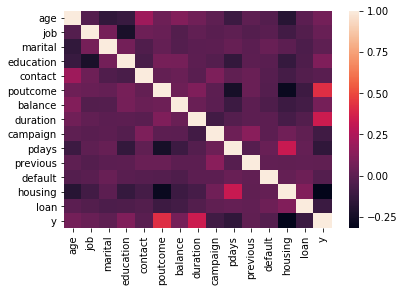

In [7]:
import seaborn as sns
corr = dff.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [8]:
dff = dff.drop('poutcome', axis = 1)

In [9]:
print(dff.shape)
dff.head()

(8257, 14)


,age,job,marital,education,contact,balance,duration,campaign,pdays,previous,default,housing,loan,y
24060,33,7,1,3,3,882,39,1,151,3,0,0,0,0
24062,42,7,2,2,3,-247,519,1,166,1,0,1,1,1
24064,33,8,1,2,3,3444,144,1,91,4,0,1,0,1
24072,36,1,1,3,3,2415,73,1,86,4,0,1,0,0
24077,36,1,1,3,3,0,140,1,143,3,0,1,0,1


In [10]:
from sklearn.model_selection import train_test_split

train_dff, test_dff = train_test_split(dff, train_size=0.8, test_size=0.2)
#train_dff_target, test_dff_target = train_test_split(dff_target, train_size = 0.8, test_size = 0.2)

## Linear regression

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


lr.normalize = False
lr.fit(train_dff.drop('y', axis=1),train_dff['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
LRTrS = lr.score(train_dff.drop('y', axis=1),train_dff['y'])
LRTeS = lr.score(test_dff.drop('y', axis=1),test_dff['y'])
print(LRTrS, LRTeS)

0.218857258864 0.215455900155


In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(dff['y'],lr.predict(dff.drop('y', axis=1)))

0.1386772282117629

In [14]:
lr.coef_

array([  7.93983874e-04,   4.45754107e-03,  -1.58016382e-03,
         3.64014479e-02,  -2.69014595e-02,   2.42992397e-06,
         5.63464816e-04,  -1.29885669e-02,  -1.58416085e-04,
         4.06405634e-03,  -1.03697974e-01,  -2.17222380e-01,
        -7.87415453e-02])

In [15]:
x_min = dff.columns[lr.coef_.argmin()]
x_max = dff.columns[lr.coef_.argmax()]

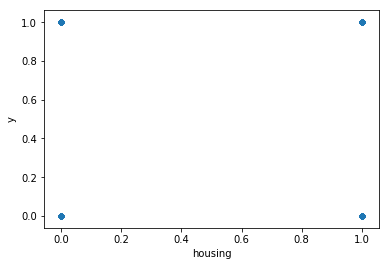

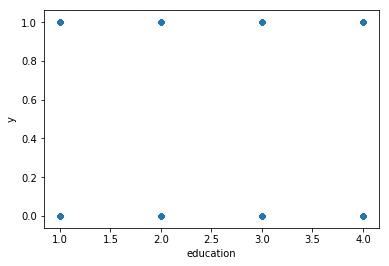

In [16]:
dff.plot.scatter(x=x_min,y='y')
dff.plot.scatter(x=x_max,y='y')

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()
lor.fit(train_dff.drop('y', axis = 1),train_dff['y'])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
LOTrS = (sum(lor.predict(train_dff.drop('y', axis=1))==train_dff['y']))/len(train_dff)
LOTeS = (sum(lor.predict(test_dff.drop('y', axis=1))==test_dff['y']))/len(test_dff)
print("Train data accuracy: ", round((100*LOTrS),2), "%")
print("Test data accuracy: ", round((100*LOTeS),2), "%")

Train data accuracy:  79.83 %
Test data accuracy:  78.15 %


## Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
#tree.criterion = 'entropy'
tree.fit(train_dff.drop('y', axis=1), train_dff['y'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(tree.predict(train_dff.drop('y',axis=1)), train_dff['y']))
DTrS = accuracy_score(train_dff['y'], tree.predict(train_dff.drop('y',axis=1)))
print(DTrS)
print(confusion_matrix(tree.predict(test_dff.drop('y',axis=1)),test_dff['y']))
DTeS = accuracy_score(tree.predict(test_dff.drop('y',axis=1)),test_dff['y'])
print(DTeS)

[[5117    0]
 [   0 1488]]
1.0
[[1040  205]
 [ 195  212]]
0.757869249395


In [21]:
tree.feature_importances_

array([ 0.11617018,  0.04636261,  0.01603812,  0.01980913,  0.00838865,
        0.1284308 ,  0.28667151,  0.02488081,  0.20114241,  0.05657005,
        0.00068635,  0.08688682,  0.00796258])

In [22]:
print(dff.columns[tree.feature_importances_.argmax()])

duration


## KNN Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(train_dff.drop('y',axis=1), train_dff['y'])
knn.predict(train_dff.drop('y',axis=1))

print("Training set confusion matrix: ") 
print(confusion_matrix(knn.predict(train_dff.drop('y',axis=1)), train_dff['y']))
print("\nTraining set accuracy: ")
KTrS = accuracy_score(train_dff['y'], knn.predict(train_dff.drop('y',axis=1)))
print(KTrS)

Training set confusion matrix: 
[[4819  547]
 [ 298  941]]

Training set accuracy: 
0.8720666162


In [24]:
print("Test set confusion matrix: ") 
print(confusion_matrix(knn.predict(test_dff.drop('y',axis=1)), test_dff['y']))
print("\nTest set accuracy: ")
KTeS = accuracy_score(test_dff['y'], knn.predict(test_dff.drop('y',axis=1)))
print(KTeS)

Test set confusion matrix: 
[[1079  243]
 [ 156  174]]

Test set accuracy: 
0.758474576271


## Naive Bayes'

In [25]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_dff.drop('y', axis=1), train_dff['y'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
NBTrS = accuracy_score(train_dff['y'], gnb.predict(train_dff.drop('y', axis = 1)))
print(NBTrS)
NBTeS = accuracy_score(test_dff['y'], gnb.predict(test_dff.drop('y', axis = 1)))
print(NBTeS)

0.773050719152
0.774818401937


## Random Forests

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_dff.drop('y', axis=1), train_dff['y'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
dff.columns[rfc.feature_importances_.argmax()]

'duration'

In [29]:
print(confusion_matrix(rfc.predict(train_dff.drop('y', axis=1)), train_dff['y']))
RFTrS = accuracy_score(train_dff['y'], rfc.predict(train_dff.drop('y', axis=1)))
print(RFTrS)

[[5117    0]
 [   0 1488]]
1.0


In [30]:
print(confusion_matrix(rfc.predict(test_dff.drop('y', axis=1)), test_dff['y']))
RFTeS = accuracy_score(test_dff['y'], rfc.predict(test_dff.drop('y', axis=1)))
print(RFTeS)

[[1138  209]
 [  97  208]]
0.814769975787


## SVM Classifier

In [31]:
from sklearn import svm

svmc = svm.SVC(gamma = 'scale')
svmc.fit(train_dff.drop('y', axis = 1), train_dff['y'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
print(confusion_matrix(svmc.predict(train_dff.drop('y', axis=1)), train_dff['y']))
SVMTrS = accuracy_score(train_dff['y'], svmc.predict(train_dff.drop('y', axis=1)))
print(SVMTrS)

[[4993  770]
 [ 124  718]]
0.864647993944


In [33]:
print(confusion_matrix(svmc.predict(test_dff.drop('y', axis=1)), test_dff['y']))
SVMTeS = accuracy_score(test_dff['y'], svmc.predict(test_dff.drop('y', axis=1)))
print(SVMTeS)

[[1155  315]
 [  80  102]]
0.760895883777


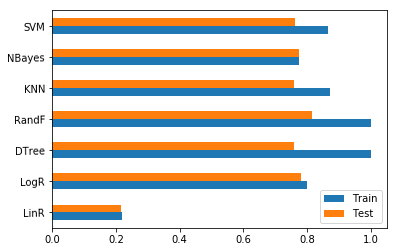

In [34]:
tr_score_list = [LRTrS, LOTrS, DTrS, RFTrS, KTrS, NBTrS, SVMTrS]
te_score_list = [LRTeS, LOTeS, DTeS, RFTeS, KTeS, NBTeS, SVMTeS]

dt = pd.DataFrame({'Train': tr_score_list, 'Test': te_score_list}, index = ['LinR', 'LogR', 'DTree', 'RandF', 'KNN', 'NBayes', 'SVM'])

dt.plot.barh(rot=1)

## Principle Component Analysis

In [35]:
from sklearn.preprocessing import StandardScaler

features = list(dff.drop('y', axis=1).columns)
u = dff.loc[:, features].values
v = y = dff.loc[:,['y']].values
u = StandardScaler().fit_transform(u)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(u)

[ 0.12523333  0.10564874]


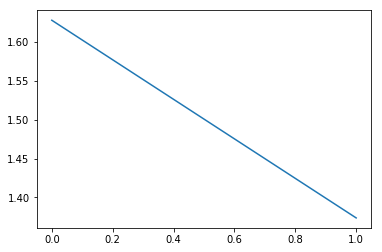

In [37]:
plt.plot(pca.explained_variance_)
print(pca.explained_variance_ratio_)

In [38]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, dff['y']], axis = 1)

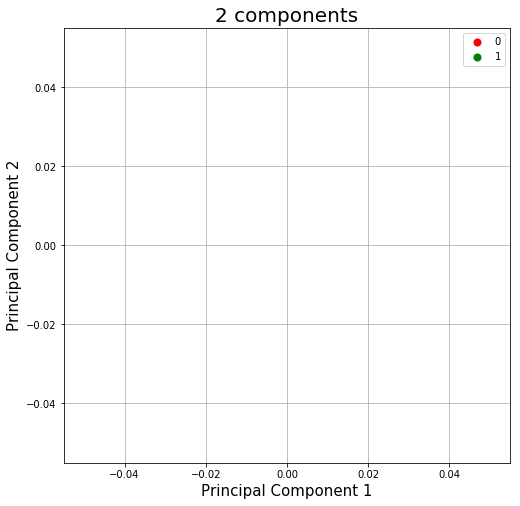

In [39]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

[ 0.12523572  0.10564928  0.09377301  0.08755768  0.08077769  0.07686521
  0.07439915  0.06921212  0.06763255  0.06311727  0.05937331  0.05103672
  0.04537029]


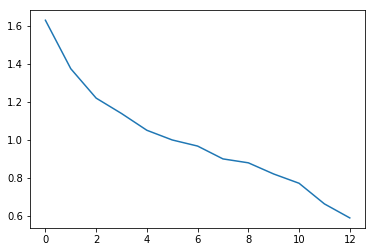

In [40]:
pca = PCA(n_components=13)
pca.fit_transform(u)
plt.plot(pca.explained_variance_)
print(pca.explained_variance_ratio_)